In [ ]:
import pandas as pd

# Define the paths to your dataset files
accident_file = "kaggle_data/accident_data.csv"
vehicle_accident_file = "kaggle_data/vehicle_data.csv"

# Step 1: Load the accident data with specified encoding
df_accident = pd.read_csv(accident_file, encoding='latin1')  

# Step 2: Load the vehicle accident data with specified encoding
df_vehicle = pd.read_csv(vehicle_accident_file, encoding='latin1')  

# Step 3: Inspect the columns to identify a common primary key
print("Accident Columns:", df_accident.columns)
print("Vehicle Accident Columns:", df_vehicle.columns)

# Step 4: Filter accident data for the year 2009
df_accident['Date'] = pd.to_datetime(df_accident['Date'], errors='coerce')
df_accident_2009 = df_accident[df_accident['Date'].dt.year == 2010] # -> ilisdi ni if nahan ka na usab ang year

# Step 5: Merge the filtered accident data with vehicle data on 'Accident_Index'
common_key = 'Accident_Index'
common_keys = pd.merge(df_accident_2009, df_vehicle, on=common_key, how='inner')

# Step 6: Display results
print(f"Number of matching keys for the year 2009: {len(common_keys)}")
print("Sample of merged data:")
print(common_keys.head())

# Step 7: Optionally, save the merged data for further use
common_keys.to_csv("filtered_common_accident_vehicle_records_2009.csv", index=False)
print("Filtered merged data for 2009 saved to 'filtered_common_accident_vehicle_records_2009.csv'")


Accident Columns: Index(['Accident_Index', '1st_Road_Class', '1st_Road_Number', '2nd_Road_Class',
       '2nd_Road_Number', 'Accident_Severity', 'Carriageway_Hazards', 'Date',
       'Day_of_Week', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'Junction_Control', 'Junction_Detail', 'Latitude', 'Light_Conditions',
       'Local_Authority_(District)', 'Local_Authority_(Highway)',
       'Location_Easting_OSGR', 'Location_Northing_OSGR', 'Longitude',
       'LSOA_of_Accident_Location', 'Number_of_Casualties',
       'Number_of_Vehicles', 'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Police_Force',
       'Road_Surface_Conditions', 'Road_Type', 'Special_Conditions_at_Site',
       'Speed_limit', 'Time', 'Urban_or_Rural_Area', 'Weather_Conditions',
       'Year', 'InScotland'],
      dtype='object')
Vehicle Accident Columns: Index(['Accident_Index', 'Age_Band_of_Driver', 'Age_of_Vehicle',
       'Driver_Home_Area_Type', 'Driver_IMD_Decile', 

In [27]:
# Step 7: Select the desired columns from the merged dataset
columns_to_keep = [
    'Accident_Severity', 
    'Did_Police_Officer_Attend_Scene_of_Accident', 
    'Speed_limit', 
    'Time', 
    'Weather_Conditions', 
    'Road_Surface_Conditions', 
    'Engine_Capacity_.CC.', 
    'make',
    'model',
    'Date',
    'Day_of_Week', 
    'Sex_of_Driver', 
    'Journey_Purpose_of_Driver', 
    'Junction_Location', 
    'Age_Band_of_Driver', 
    'Age_of_Vehicle', 
    'Number_of_Casualties', 
    'Number_of_Vehicles'
]

# Filter the DataFrame to retain only the desired columns
common_keys_cleaned = common_keys[columns_to_keep]

# Step 8: Display the cleaned data
print("Cleaned data with selected columns:")
print(f"Number of data on the cleaned data: {len(common_keys_cleaned)}")
print(common_keys_cleaned.head())

# Step 9: Save the cleaned data to a new file
cleaned_file = "cleaned_common_accident_vehicle_records.csv"
common_keys_cleaned.to_csv(cleaned_file, index=False)
print(f"Cleaned merged data saved to '{cleaned_file}'")



Cleaned data with selected columns:
Number of data on the cleaned data: 42992
  Accident_Severity  Did_Police_Officer_Attend_Scene_of_Accident  Speed_limit  \
0            Slight                                          1.0           30   
1            Slight                                          1.0           30   
2            Slight                                          1.0           30   
3            Slight                                          1.0           30   
4            Slight                                          1.0           30   

    Time     Weather_Conditions Road_Surface_Conditions  Engine_Capacity_.CC.  \
0  07:30                  Other             Wet or damp                1360.0   
1  18:35  Raining no high winds             Wet or damp                1870.0   
2  10:22     Fine no high winds                     Dry                3920.0   
3  21:21     Fine no high winds                     Dry                1998.0   
4  21:21     Fine no high wind

Checking for missing values:
Accident_Severity            0
Sex_of_Driver                0
Age_Band_of_Driver           0
Journey_Purpose_of_Driver    0
Day_of_Week                  0
Date                         0
Time                         0
dtype: int64

Missing values after dropping:
Accident_Severity            0
Sex_of_Driver                0
Age_Band_of_Driver           0
Journey_Purpose_of_Driver    0
Day_of_Week                  0
Date                         0
Time                         0
dtype: int64


C:\Users\acer\AppData\Local\Temp\ipykernel_22208\550099564.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demographics_data.dropna(inplace=True)
C:\Users\acer\AppData\Local\Temp\ipykernel_22208\550099564.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demographics_data['Sex_of_Driver'] = demographics_data['Sex_of_Driver'].map({'Male': 0, 'Female': 1})
C:\Users\acer\AppData\Local\Temp\ipykernel_22208\550099564.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = valu


Processed driver demographics data saved to 'driver_demographics_processed.csv'


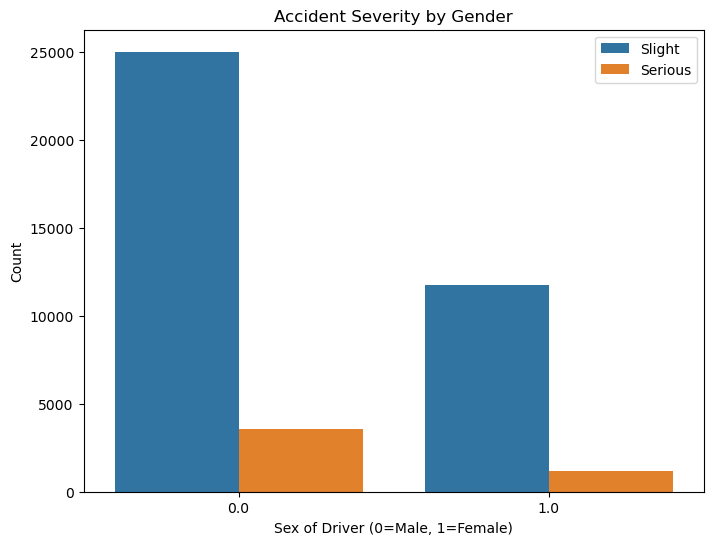

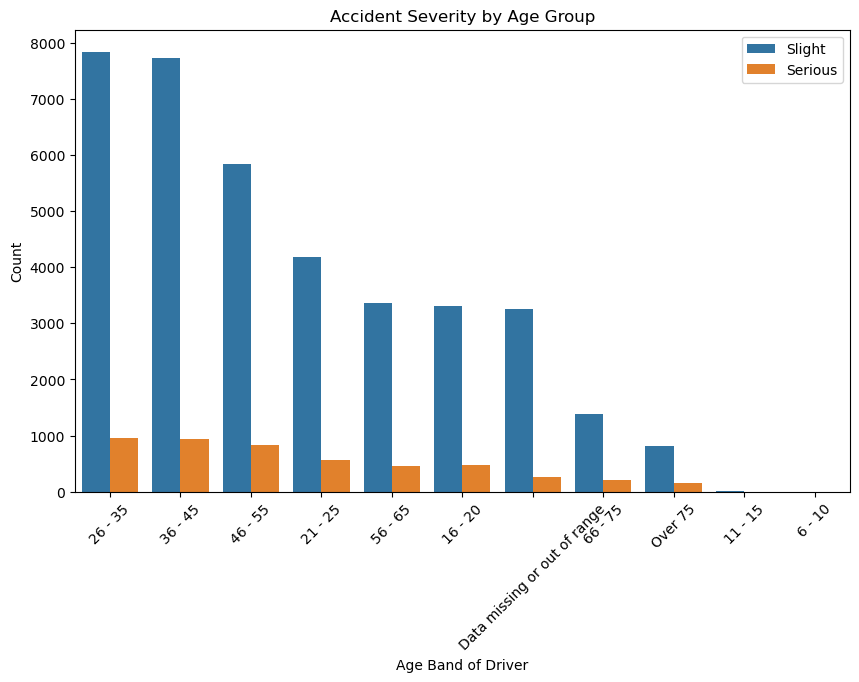

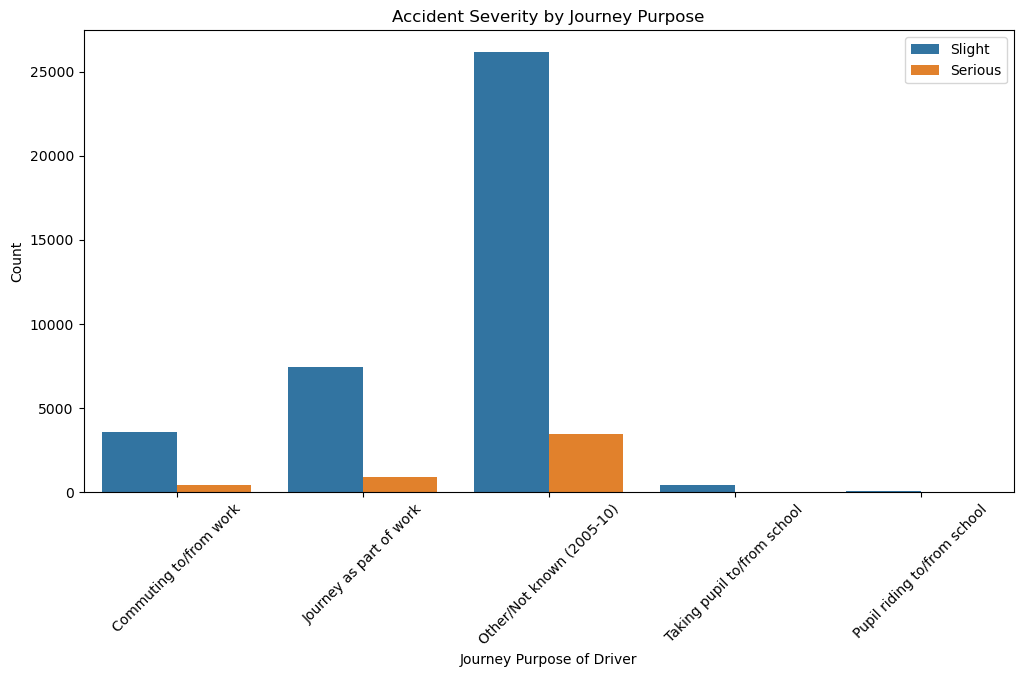

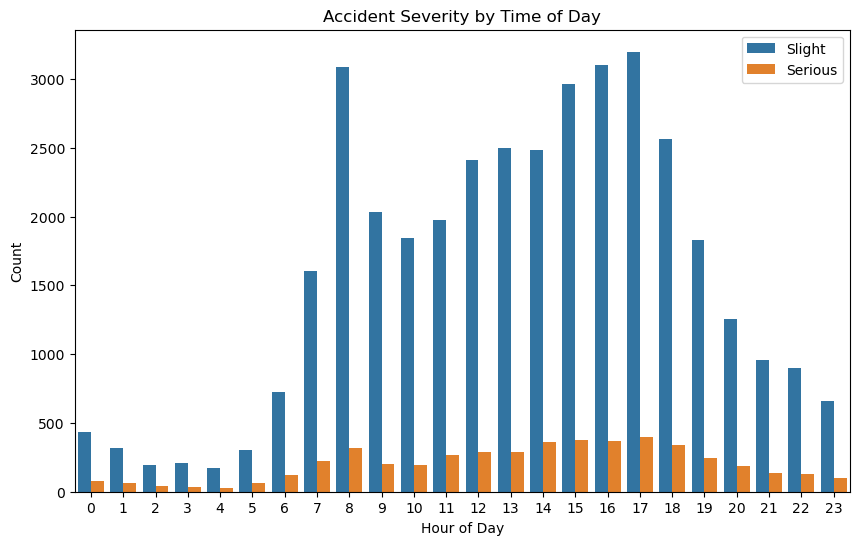

In [28]:
# Driver Demographics: 
# 
# Coloumns Focused : ( Sex_of_Driver, Age_Band_of_Driver, Journey_Purpose_of_Driver )
# Rows Affected : ( Day_of_Week, Time, Accident_Severity )

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the cleaned dataset
cleaned_file = "cleaned_common_accident_vehicle_records.csv"
data = pd.read_csv(cleaned_file)

# Step 2: Filter only the columns relevant to driver demographics
columns_to_keep = [
    'Accident_Severity', 
    'Sex_of_Driver', 
    'Age_Band_of_Driver', 
    'Journey_Purpose_of_Driver', 
    'Day_of_Week', 
    'Date',  # Added Date column to process the year later
    'Time'
]
demographics_data = data[columns_to_keep]

# Step 3: Check for missing values
print("Checking for missing values:")
print(demographics_data.isnull().sum())

# Step 4: Handle missing values by dropping rows with any missing data
demographics_data.dropna(inplace=True)

# Step 5: Check again after dropping rows
print("\nMissing values after dropping:")
print(demographics_data.isnull().sum())

# Step 6: Encode categorical variables
# Encode 'Sex_of_Driver': Male -> 0, Female -> 1
demographics_data['Sex_of_Driver'] = demographics_data['Sex_of_Driver'].map({'Male': 0, 'Female': 1})

# Encode 'Accident_Severity': Slight -> 0, Serious -> 1
demographics_data['Accident_Severity'] = demographics_data['Accident_Severity'].map({'Slight': 0, 'Serious': 1})

# Extract hour from 'Time'
demographics_data['Hour'] = pd.to_datetime(demographics_data['Time'], errors='coerce').dt.hour


# Step 9: Save processed demographics data
demographics_file = "driver_demographics_processed.csv"
demographics_data.to_csv(demographics_file, index=False)
print(f"\nProcessed driver demographics data saved to '{demographics_file}'")

# Step 10: Visualizations

# 1. Accident Severity by Gender
plt.figure(figsize=(8, 6))
sns.countplot(x='Sex_of_Driver', hue='Accident_Severity', data=demographics_data)
plt.title('Accident Severity by Gender')
plt.xlabel('Sex of Driver (0=Male, 1=Female)')
plt.ylabel('Count')
plt.legend(['Slight', 'Serious'])
plt.show()

# 2. Accident Severity by Age Group
plt.figure(figsize=(10, 6))
sns.countplot(x='Age_Band_of_Driver', hue='Accident_Severity', data=demographics_data,
              order=demographics_data['Age_Band_of_Driver'].value_counts().index)
plt.title('Accident Severity by Age Group')
plt.xlabel('Age Band of Driver')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(['Slight', 'Serious'])
plt.show()

# 3. Accident Severity by Journey Purpose
plt.figure(figsize=(12, 6))
sns.countplot(x='Journey_Purpose_of_Driver', hue='Accident_Severity', data=demographics_data)
plt.title('Accident Severity by Journey Purpose')
plt.xlabel('Journey Purpose of Driver')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(['Slight', 'Serious'])
plt.show()

# 4. Accident Severity by Hour of Day
plt.figure(figsize=(10, 6))
sns.countplot(x='Hour', hue='Accident_Severity', data=demographics_data)
plt.title('Accident Severity by Time of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Count')
plt.legend(['Slight', 'Serious'])
plt.show()

